In [1]:
import mglearn
import sklearn
import matplotlib.pyplot as plt
import numpy as np


Общераспространненный  подход,  позволяющий  распространить алгоритм бинарной классификации на случай мультиклассовой классификации называет подходом один против остальных(one-vs.-rest)
В подходе «один против остальных» для каждого класса строится бинарная модель, которая пытается отделитьэтот класс от всех остальных, в результате чего  количество  моделей  определяется  количеством  классов.  Для  получения  прогноза  точка тестового набора подается на все бинарные классификаторы. Классификатор, который выдает по своему классу наибольшее значение, «побеждает» и метка этого класса возвращается в качестве прогноза.

Используя  бинарный  классификатор  для  каждого  класса,  мы  получаем  один вектор коэффициентов  (w)и  одну константу  (b)по  каждому  классу.

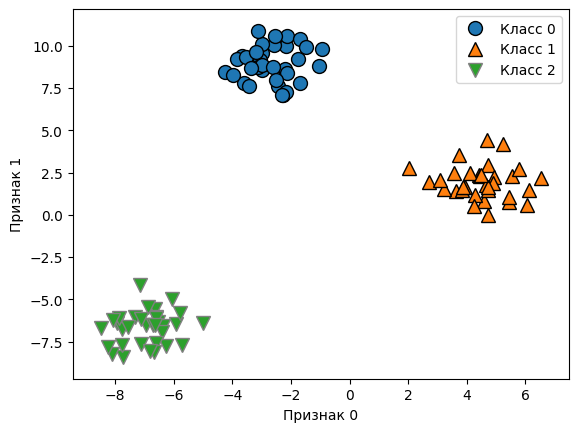

In [2]:

from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")
plt.legend(["Класс 0", "Класс 1", "Класс 2"])
plt.show()


In [5]:

from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)
print("Форма коэффициента: ", linear_svm.coef_.shape)
print("Форма константы: ", linear_svm.intercept_.shape)


Форма коэффициента:  (3, 2)
Форма константы:  (3,)


Мы видим, что атрибут coef_имеет форму (3, 2), это означает, что каждая строка coef_ содержит вектор  коэффициентовдля  каждого  из  трех  классов,  а каждый  столбецсодержит коэффициентдля конкретного признака (в этом наборе данных их два). Атрибут intercept_теперь является одномерным массивом, в котором записаны константы классов

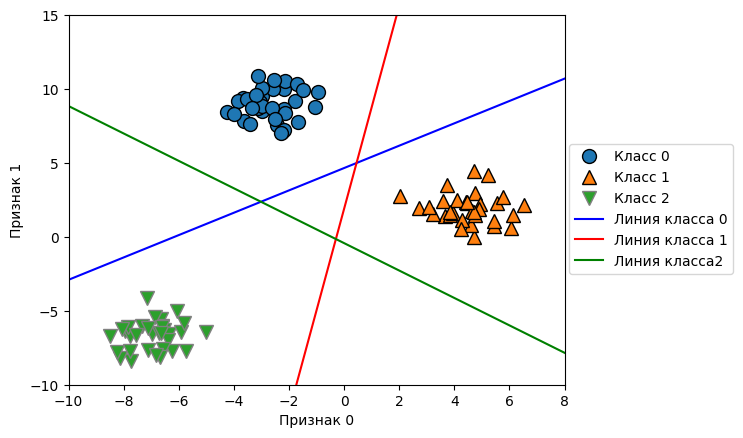

In [6]:

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")
plt.legend(['Класс 0', 'Класс 1', 'Класс 2', 'Линия класса 0', 'Линия класса 1', 'Линия класса2'], loc=(1.01, 0.3))
plt.show()


Давайте визуализируем линии (границы принятия решений), полученные с помощью трех бинарных классификаторов (рис. 6.2

Однако что насчет треугольника в середине графика? Все три бинарных классификатора относят  точки,  расположенные  там,  к  «остальным».  Какой  класс  будет  присвоен  точке, расположенной  в  треугольнике?  Ответ –класс,  получивший  наибольшее  значение  по  формуле классификации, то есть класс ближайшей линии

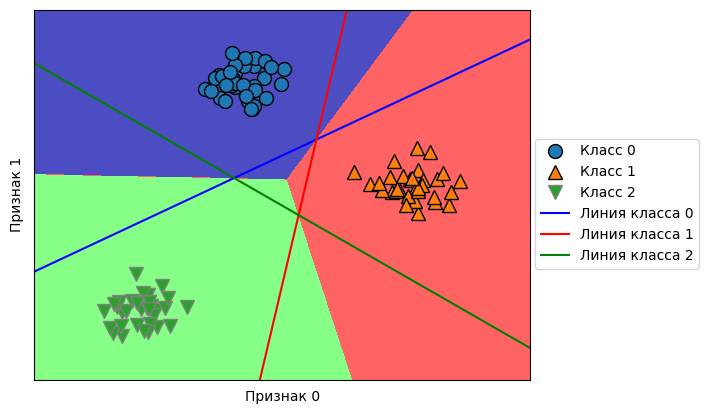

In [7]:

mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Класс 0', 'Класс 1', 'Класс 2', 'Линия класса 0', 'Линия класса 1','Линия класса 2'], loc=(1.01, 0.3))
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")
plt.show()

Следующий  пример  (рис. 6.3)  показывает  прогнозы  для  всех  областей  двумерного пространства

Основной параметр линейных моделей –параметр регуляризации, называемый alphaв моделях регрессиии Cв LinearSVCи LogisticRegression

Большие значения alphaили маленькие значения Cозначают  простые  модели

Как правило,  поиск Cи alphaосуществляется  по логарифмической  шкале

Кроме  того  вы  должны  решить,  какой  вид  регуляризации  нужно использовать: L1или L2. Если вы полагаете, что на самом деле важны лишь некоторые признаки, следует  использовать L1.  В  противном  случае  используйте  установленную  по  умолчанию L2регуляризацию.  Еще L1регуляризация  может  быть  полезна,  если  интерпретируемость  модели имеет  важное  значение.  Поскольку L1регуляризация  будет  использовать  лишь  несколько признаков,  легче  будет  объяснить,  какие  признаки  важны  для  модели  и  каковы  эффекты  этих признаков

Линейные  модели  очень  быстро  обучаются,  а  также  быстро  прогнозируют.  Они масштабируются  на  очень  большие  наборы  данных,также  хорошо  работают  с  разреженными данными.  При  работе  с  данными,  состоящими  из  сотен  тысяч  или  миллионов  примеров,  вас,возможно, заинтересует опция solver='sag' в LogisticRegression и Ridge, которая позволяет получить результаты быстрее, чем настройки по умолчанию. Еще пара опций –это класс SGDClassifier и класс SGDRegressor, реализующие более масштабируемые версии описанных здесь линейных моделей.

Еще  одно  преимущество  линейных  моделей  заключается  в  том,  что  они  позволяют относительно легко понять, как был получен прогноз, при помощи формул, которые мы видели ранее для регрессии и классификации

Как правило, линейные модели хорошо работают, когда количество признаков превышает количество наблюдений. Кроме того, они часто используются на очень больших наборах данных, просто  потому,  что  не  представляется  возможным  обучить  другие  модели

Здесь мы использовали значение, возвращаемое методом fit(self), чтобы присвоить обученную модель переменной logreg. Эта конкатенация вызовов методов (в данном случае _init_, а затем fit) известна как цепочка методов(methodchaining).Еще одно обшераспространенное применение цепочки методов в scikit-learn–это связывание методовfitи predictв одной строке